<a href="https://colab.research.google.com/github/Gudekar/ml_assignment1/blob/main/iris_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
# Assignment: Import Iris dataset and apply Naive Bayes

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
from sklearn.datasets import load_iris

In [120]:
i = load_iris()
pd.DataFrame(i.data,columns=i.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [121]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [122]:
i.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [123]:
print(i['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [124]:
i.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [125]:
#data formation
df = pd.DataFrame(i.data,columns=i.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [126]:
#check target
i.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [127]:
#check unique target
np.unique(i.target)

array([0, 1, 2])

In [128]:
len(i.target)

150

In [129]:
df['output'] = i.target
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [130]:
#split the data
from sklearn.model_selection import train_test_split

In [131]:
X = df.drop(columns='output')
X[:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [132]:
y = df.output
y[:2]

0    0
1    0
Name: output, dtype: int64

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8)

In [134]:
from sklearn.naive_bayes import BernoulliNB  # binary data

In [135]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
bnb.score(X_train,y_train)*100

37.5

In [136]:
from sklearn.naive_bayes import MultinomialNB  # catogorical data

In [137]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb.score(X_train,y_train)*100

72.5

In [138]:
from sklearn.naive_bayes import GaussianNB  #input having continuos values

In [139]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)*100

95.83333333333334

Frome above result we are going to continue with GaussianNB

In [140]:
#test phase
y_pred = gnb.predict(X_test)
y_pred[:5]

array([2, 2, 2, 2, 0])

In [141]:
y_test[:5]

121    2
118    2
117    2
123    2
38     0
Name: output, dtype: int64

Performance metrics



In [142]:
from sklearn.metrics import confusion_matrix,classification_report

In [143]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 5,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 16]])

Text(70.72222222222221, 0.5, 'Actual')

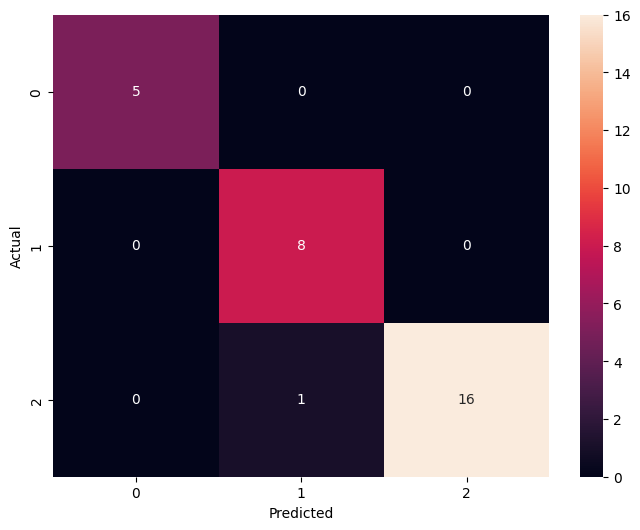

In [144]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')


In [148]:
sum(y_pred==2) #columnwise predicted data

16

In [150]:
sum(y_test==2)# rowwise actual data

17

In [152]:
sum(y_test==1)

8

In [146]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.89      1.00      0.94         8
           2       1.00      0.94      0.97        17

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30

